In [15]:
import matplotlib.pyplot as plt
from fut_stats.config import collection_matches

def plot_goal_difference_evolution(player_names):
    plt.figure(figsize=(10, 6))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    markers = ['o', 's', '^', 'p', '*', '+', 'x']
    color_marker_combinations = [(colors[i % len(colors)], markers[i % len(markers)]) for i in range(len(player_names))]

    for player_index, player_name in enumerate(player_names):
        matches = list(collection_matches.find({
            "$or": [
                {"team_a.name": player_name},
                {"team_b.name": player_name}
            ]
        }))

        processed_matches = []
        goal_difference = 0
        for match in matches:
            match_date = match['date']
            if player_name in [player['name'] for player in match['team_a']]:
                goal_difference += int(match['goals_team_a']) - int(match['goals_team_b'])
            elif player_name in [player['name'] for player in match['team_b']]:
                goal_difference += int(match['goals_team_b']) - int(match['goals_team_a'])

            processed_matches.append({
                "date": match_date,
                "goal_difference": goal_difference
            })

        processed_matches.sort(key=lambda x: x["date"])

        dates = [match["date"] for match in processed_matches]
        goal_differences = [match["goal_difference"] for match in processed_matches]

        color, marker = color_marker_combinations[player_index]
        plt.plot(dates, goal_differences, marker=marker, linestyle='-', color=color, label=player_name)

    plt.title("Evolution of Goal Difference for Players")
    plt.xlabel("Date")
    plt.ylabel("Goal Difference")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    plt.show()

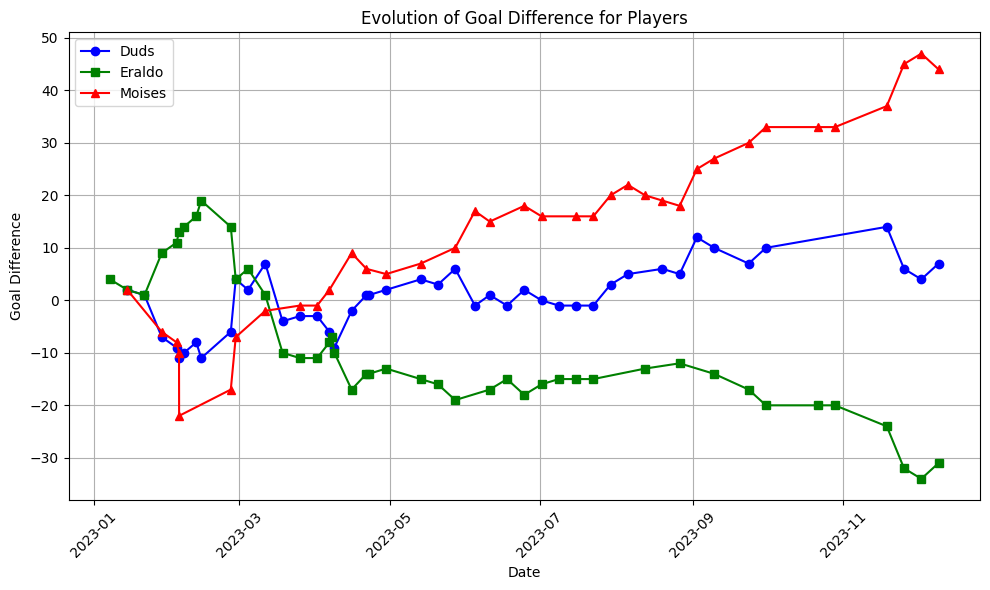

In [19]:
plot_goal_difference_evolution(['Duds', 'Eraldo', 'Moises'])